In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import pickle

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

from sklearn import set_config; set_config(display='diagram')


In [72]:
df = pd.read_csv('../../raw_data/huggingface.co_human_ai_generated_text/model_training_dataset_sequences_enriched.csv')
print(df.shape)
print(df.columns)

(29207, 7)
Index(['text', 'generated', 'punctuations', 'neg_sentiment_polarity',
       'pos_sentiment_polarity', 'corrections', 'text_lenght'],
      dtype='object')


<Axes: xlabel='generated', ylabel='corrections'>

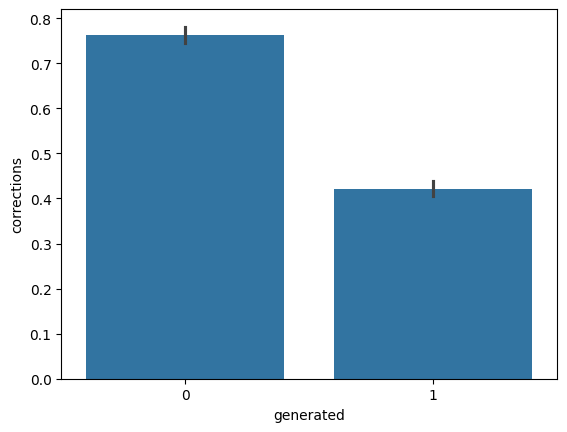

In [73]:
sns.barplot(data=df, x="generated", y="corrections")

In [74]:
from detect_ai_content.ml_logic.for_texts.using_ml_features.using_sentences_decomposition import *

df_preprocessed = preprocess(data=df, execute_enrich=False)
df_preprocessed.shape

(29207, 5)

In [75]:
df_preprocessed

array([[-0.5       ,  0.        ,  1.05652174,  0.        , -0.8974359 ],
       [-0.5       , -0.08      , -0.35217391,  0.        , -0.16666667],
       [-0.5       ,  0.        , -0.35217391,  1.        ,  0.26923077],
       ...,
       [ 0.        , -0.053125  , -0.35217391,  0.        ,  0.70512821],
       [ 0.5       , -0.07222222, -0.35217391,  1.        ,  0.23076923],
       [ 0.        ,  0.        , -0.35217391,  0.        , -0.75641026]])

In [76]:
model = train_LogisticRegression_model(X_train_processed=df_preprocessed, y_train=df['generated'])

# model_path = '../../detect_ai_content/models/leverdewagon/sequences_logit.pickle'
# pickle.dump(model, open(model_path, 'wb'))

In [77]:
text = "The youngers student needs the olders student like the olders student need a adult to they can say dont do this is the same the younger. student need the olders student they can help each others. If the youngers studetn have a promble or a question they can ask the olders student. To do right this some student of the youngers schools they dont know english the olders studen. Can help them some times the olders student needs the youngerts students to do somenthing like if the olders sstudent dont know somenthing they can."
sentences_df = to_sentences(pd.DataFrame(data={'text':[text]}), include_generated=False)
sentences_preprocessed_df = preprocess(sentences_df)
preds = model.predict(X=sentences_preprocessed_df)

START:The youngers student needs the olders student like the olders student need a adult to they can say dont do this is the same the younger.:END
START:student need the olders student they can help each others.:END
START:If the youngers studetn have a promble or a question they can ask the olders student.:END
START:To do right this some student of the youngers schools they dont know english the olders studen.:END
START:Can help them some times the olders student needs the youngerts students to do somenthing like if the olders sstudent dont know somenthing they can.:END
_number_of_corrections_using_Spacy: The youngers student needs the olders student like the olders student need a adult to they can say dont do this is the same the younger.
_number_of_corrections_using_Spacy: student need the olders student they can help each others.
_number_of_corrections_using_Spacy: If the youngers studetn have a promble or a question they can ask the olders student.
_number_of_corrections_using_Spac

In [78]:
preds

array([0, 1, 0, 0, 0])